In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [35]:
start = '2012-01-01'
end = '2023-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [36]:
data.reset_index(inplace=True)

In [37]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.262545,16.641375,16.248346,16.573130,16.573130,147611217
1,2012-01-04,16.563665,16.693678,16.453827,16.644611,16.644611,114989399
2,2012-01-05,16.491436,16.537264,16.344486,16.413727,16.413727,131808205
3,2012-01-06,16.417213,16.438385,16.184088,16.189817,16.189817,108119746
4,2012-01-09,16.102144,16.114599,15.472754,15.503389,15.503389,233776981
...,...,...,...,...,...,...,...
3007,2023-12-14,134.770004,135.035004,131.059998,133.199997,133.199997,29619100
3008,2023-12-15,132.919998,134.830002,132.630005,133.839996,133.839996,58569400
3009,2023-12-18,133.860001,138.380005,133.770004,137.190002,137.190002,25699800
3010,2023-12-19,138.000000,138.770004,137.449997,138.100006,138.100006,20661000


In [38]:
ma_100_days = data.Close.rolling(100).mean()

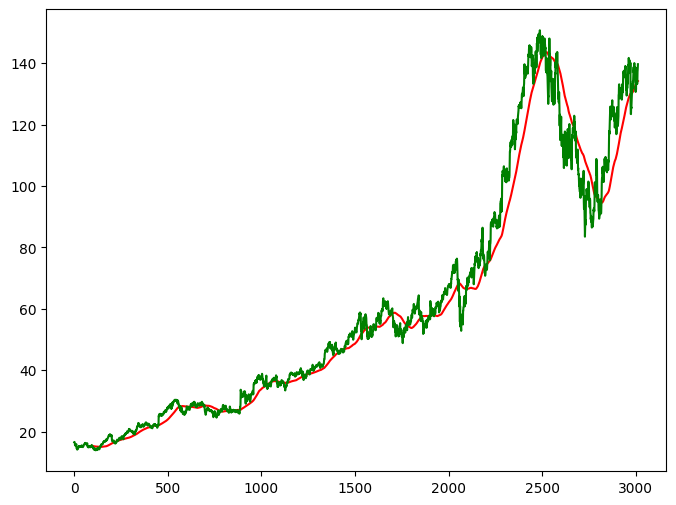

In [39]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [40]:
ma_200_days = data.Close.rolling(200).mean()

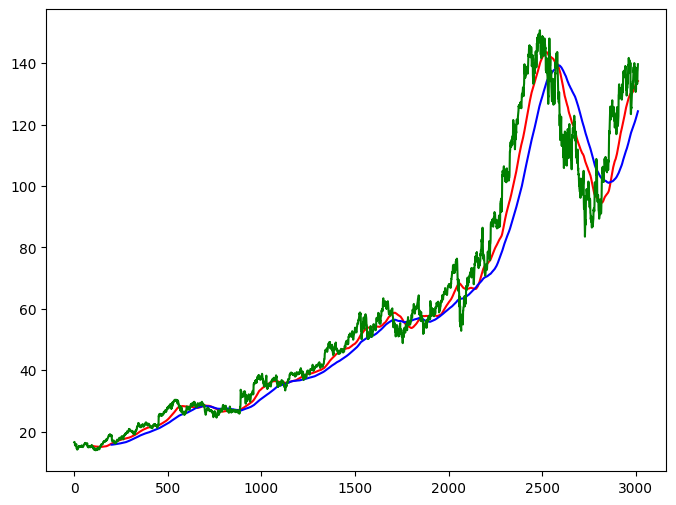

In [41]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [42]:
data.dropna(inplace=True)

In [43]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [44]:
data_train.shape[0]

2409

In [45]:
data_test.shape[0]

603

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [47]:
data_train_scale = scaler.fit_transform(data_train)

In [48]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

In [49]:
x, y = np.array(x), np.array(y)

In [50]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [51]:
from keras.optimizers import RMSprop

model = Sequential()
model.add(LSTM(units = 100, activation = 'tanh', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.3))

model.add(LSTM(units = 120, activation='tanh', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 160, activation = 'tanh', return_sequences = True))
model.add(Dropout(0.5))

model.add(LSTM(units = 200, activation = 'tanh'))
model.add(Dropout(0.5))

model.add(Dense(units =1, activation='linear'))

model.compile(loss = 'mean_absolute_error', optimizer = RMSprop())

model.fit(x,y, epochs = 100, batch_size =32 , verbose =1, validation_split=0.2)

Epoch 1/100
58/58 [==============================] - 18s 225ms/step - loss: 0.0658 - val_loss: 0.1845
Epoch 2/100
58/58 [==============================] - 11s 195ms/step - loss: 0.0400 - val_loss: 0.0733
Epoch 3/100
58/58 [==============================] - 11s 194ms/step - loss: 0.0321 - val_loss: 0.1618
Epoch 4/100
58/58 [==============================] - 11s 193ms/step - loss: 0.0316 - val_loss: 0.0739
Epoch 5/100
58/58 [==============================] - 11s 193ms/step - loss: 0.0275 - val_loss: 0.0441
Epoch 6/100
58/58 [==============================] - 11s 193ms/step - loss: 0.0280 - val_loss: 0.0356
Epoch 7/100
58/58 [==============================] - 11s 193ms/step - loss: 0.0260 - val_loss: 0.1167
Epoch 8/100
58/58 [==============================] - 11s 199ms/step - loss: 0.0254 - val_loss: 0.0274
Epoch 9/100
58/58 [==============================] - 11s 194ms/step - loss: 0.0248 - val_loss: 0.0291
Epoch 10/100
58/58 [==============================] - 11s 194ms/step - loss: 0.024

In [52]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [53]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100, 100)          40800     
                                                                 
 dropout_8 (Dropout)         (None, 100, 100)          0         
                                                                 
 lstm_9 (LSTM)               (None, 100, 120)          106080    
                                                                 
 dropout_9 (Dropout)         (None, 100, 120)          0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 160)          179840    
                                                                 
 dropout_10 (Dropout)        (None, 100, 160)          0         
                                                                 
 lstm_11 (LSTM)              (None, 200)              

In [54]:
pas_100_days = data_train.tail(100)

In [55]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [56]:
data_test_scale  =  scaler.fit_transform(data_test)

In [57]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [58]:
y_predict = model.predict(x)

19/19 [==============================] - 2s 58ms/step


In [59]:
scale =1/scaler.scale_

In [60]:
y_predict = y_predict*scale

In [61]:
y = y*scale

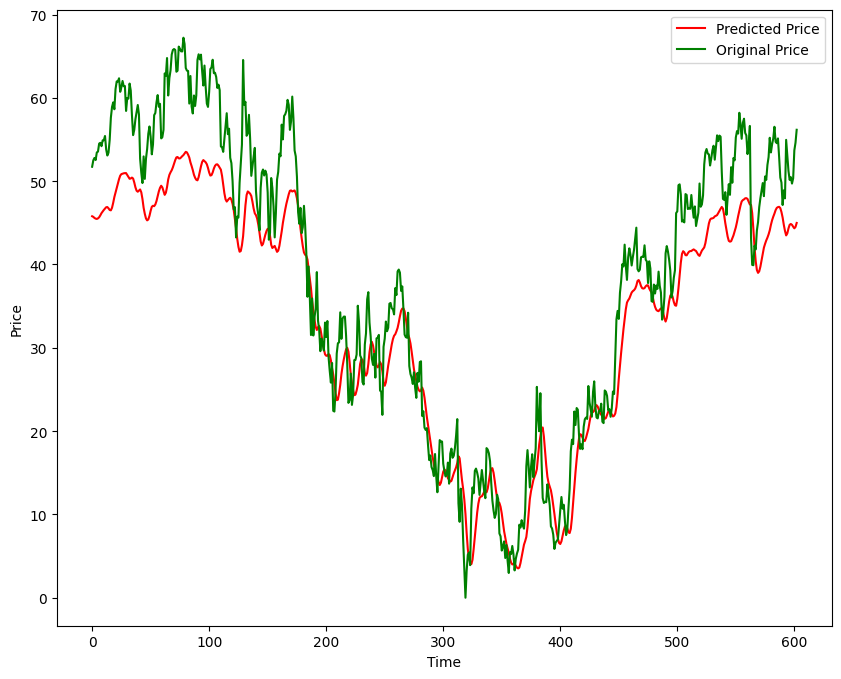

In [62]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [63]:
model.save('Stock Predictions Model.keras')

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Rescale the predicted and original prices
y_predict_rescaled = scaler.inverse_transform(y_predict)
y_rescaled = scaler.inverse_transform(y.reshape(-1, 1))

# Calculate evaluation metrics
mae = mean_absolute_error(y_rescaled, y_predict_rescaled)
mse = mean_squared_error(y_rescaled, y_predict_rescaled)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)



Mean Absolute Error (MAE): 373.3733565465091
Mean Squared Error (MSE): 203466.68952896117
Root Mean Squared Error (RMSE): 451.0728206497939


In [65]:
# Calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mape = calculate_mape(y_rescaled, y_predict_rescaled)
print("Mean Absolute Percentage Error (MAPE): {:.2f}%".format(mape))

Mean Absolute Percentage Error (MAPE): 16.72%
